<a href="https://colab.research.google.com/github/mohmaed7777/Ames-Housing-prediction-with-linear-regression-/blob/main/Linear_Regression_Classifier_for_Ames_Houses_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn.metrics import r2_score
%pylab inline
%config InlineBackend.figure_formats=['retina']
print('Setup Complete^_____^')

Populating the interactive namespace from numpy and matplotlib
Setup Complete^_____^


In [24]:
file_path = '/content/KEh0FlFxQOuIdBZRcXDrwA_0dde15d9a6514d0e8a0fa13c41b9e1d7_Ames_Housing_Sales.csv'
df = pd.read_csv(file_path)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1,0,Gd,150.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2,TA,RFn,TA,Attchd,2003.0,1710.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450.0,Inside,65.0,Reg,0.0,60,RL,196.0,BrkFace,None,0.0,2,CollgCr,61.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0,1,Gd,284.0,Y,Feedr,Norm,SBrkr,0.0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2,TA,RFn,TA,Attchd,1976.0,1262.0,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600.0,FR2,80.0,Reg,0.0,20,RL,0.0,None,None,0.0,5,Veenker,0.0,8,6,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1,0,Gd,434.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2,TA,RFn,TA,Attchd,2001.0,1786.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250.0,Inside,68.0,IR1,0.0,60,RL,162.0,BrkFace,None,0.0,9,CollgCr,42.0,5,7,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1,0,TA,540.0,Y,Norm,Norm,SBrkr,272.0,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3,TA,Unf,TA,Detchd,1998.0,1717.0,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550.0,Corner,60.0,IR1,0.0,70,RL,0.0,None,None,0.0,2,Crawfor,35.0,5,7,Y,0.0,None,CompShg,Gable,Abnorml,WD,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1,0,Gd,490.0,Y,Norm,Norm,SBrkr,0.0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3,TA,RFn,TA,Attchd,2000.0,2198.0,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260.0,FR2,84.0,IR1,0.0,60,RL,350.0,BrkFace,None,0.0,12,NoRidge,84.0,5,8,Y,0.0,None,CompShg,Gable,Normal,WD,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [25]:
df.shape

(1379, 80)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [27]:
# We need to know the numbers of strings(objects)/int/floats that we have in our dataframe : 
df.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [28]:
# Unordered catigorical should be one-hot-encoded:
# select the objects(strings) columns : 
mask = df.dtypes == np.object
mask

1stFlrSF        False
2ndFlrSF        False
3SsnPorch       False
Alley            True
BedroomAbvGr    False
                ...  
WoodDeckSF      False
YearBuilt       False
YearRemodAdd    False
YrSold          False
SalePrice       False
Length: 80, dtype: bool

In [29]:
# categorical columns : 
categorical_cols = df.columns[mask]
categorical_cols[:]

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [30]:
num_ohc_cols = df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

In [39]:
num_ohc_cols

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType          9
Condition1        9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      7
FireplaceQu       6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
Heating           6
GarageType        6
BsmtExposure      5
Electrical        5
Fence             5
GarageCond        5
GarageQual        5
BsmtQual          5
LotConfig         5
MSZoning          5
MiscFeature       5
BldgType          5
HeatingQC         5
KitchenQual       4
LandContour       4
BsmtCond          4
LotShape          4
MasVnrType        4
ExterQual         4
ExterCond         4
PoolQC            4
Alley             3
GarageFinish      3
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64

In [31]:
# no need to encodeif there is only one value: 
small_num_ohc_col = num_ohc_cols.loc[num_ohc_cols > 1 ]

In [32]:
# Number of one hot columns is one less than the number of categorical columns : 
small_num_ohc_col -= 1

In [33]:
# Check the new extra columns has been created: 
small_num_ohc_col.sum()

215

In [34]:
# Create a new dataframe where all the categrical features will be hot encoded ; 
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Create acopy of the data: 
data_ohc = df.copy()

In [37]:
# Create OneHotEncoder: 
ohc = OneHotEncoder()

In [41]:
for col in num_ohc_cols.index:

  # onehotencode the data--this returns a spare array
  new_dat = ohc.fit_transform(data_ohc[[col]])
  # drop the original column from the dataframe:
  data_ohc = data_ohc.drop(col, axis=1)
  # Get the names of all unique values in the column:
  cats = ohc.categories_
  # create column names for each OHC column by value: 
  new_cols = ['_'.join([col, cat]) for cat in cats[0]]
  #create a new datafream:
  new_df = pd.DataFrame(new_dat.toarray(), columns=new_cols)
  # Append the new_data to the DataFream: 
  data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [42]:
# Columns diffrences is as calculated above : 
data_ohc.shape[1] - df.shape[1]

215

In [44]:
print(df.shape[1])
# Remove the sting columns from the datafream: 
df = df.drop(num_ohc_cols.index, axis=1)
print(df.shape[1])

80
37


In [92]:
y_cols = 'SalePrice'
# Split the data that is not one_hot_encoded: 
features_cols = [x for x in df.columns if x != y_cols]
x_data = df[features_cols]
y_data = df[y_cols]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
# Split the data that is one_hot_encoded: 
features_cols = [x for x in data_ohc.columns if x != y_cols]
x_data_ohc = data_ohc[features_cols]
y_data_ohc = data_ohc[y_cols]
x_train_ohc, x_test_ohc, y_train_ohc, y_test_ohc = train_test_split(x_data_ohc, y_data_ohc, test_size=0.3, random_state=42)

In [93]:
# compare the indices to ensure they are they identical : 
(x_train.index == x_train_ohc.index).all()


True

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error


In [95]:
# Create the model: 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
# Storage the error values : 
error_df = list()


In [98]:

# Data that have not been oneHotEncoded: 
lr = lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test':mean_squared_error(y_test, y_test_pred)},
                          name='No- Hot_endcoded'))
# Data that have been oneHotEncoded: 
lr = lr.fit(x_train_ohc, y_train_ohc)
y_train_ohc_pred = lr.predict(x_train_ohc)
y_test_ohc_pred = lr.predict(x_test_ohc)
error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test':mean_squared_error(y_test_ohc, y_test_ohc_pred)},
                          name='Hot_endcoded'))
# Assemble the results : 
error_df = pd.concat(error_df, axis=1)
error_df

,No- Hot_endcoded,No- Hot_endcoded,Hot_endcoded
train,1.131507e+09,1.131507e+09,3.177262e+08
test,1.372182e+09,1.372182e+09,2.089927e+17


#**Scale the values and compare the error calculated on the testset:**

In [99]:
# Mute the setting with the copy warings : 
pd.options.mode.chained_assignment = None

In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [101]:
scalers = {'Standard': StandardScaler(),
           'Minimax': MinMaxScaler()}
           

In [102]:
# Initilize the model : 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
# Iterate over all possiable compaintions and get errors : 
errors = {}
for scaler_label, scaler in scalers.items():
  training_set = scaler.fit_transform(x_train)
  test_set = scaler.fit_transform(x_test)
  lr.fit(training_set, y_train)
  predictions = lr.predict(test_set)
  key = scaler_label + 'Scaling'
  errors[key] = mean_squared_error(y_test, predictions)
errors = pd.Series(errors)
for key, error_val in errors.items():
  print(key, error_val)

StandardScaling 1359298570.4070227
MinimaxScaling 3696093684.070986


#**Plot predictions vs actual for one the mode:**

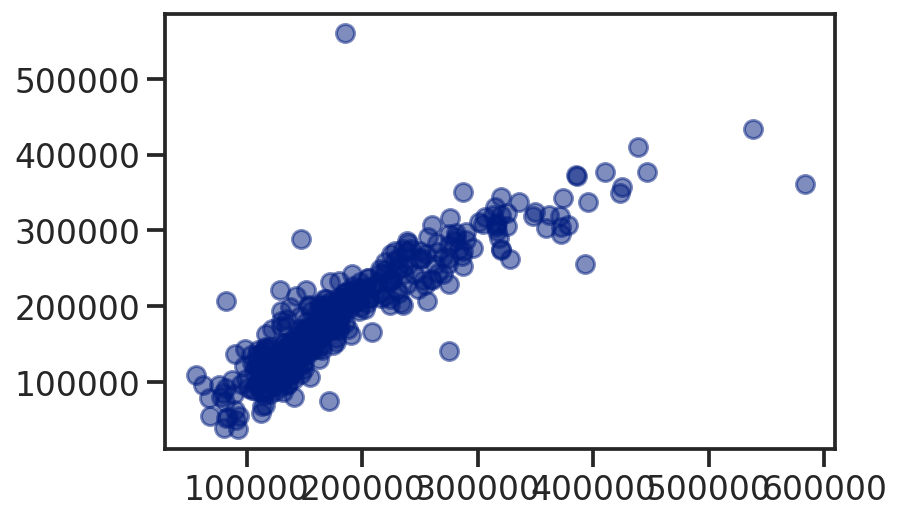

In [109]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
ax = plt.axes()
ax.scatter(y_test, y_test_pred, alpha=0.5)